### Multiple Linear Regression Exercise

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('forestfires.csv')

In [3]:
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


Problem Statement: It is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data.

In [4]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [5]:
data.duplicated().sum()

4

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(513, 13)

In [9]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [10]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [11]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [12]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

oe = pd.get_dummies(data, columns=['month', 'day'], drop_first=True)

Observation: Used one-hot encoding as they don't have continuous values.

In [13]:
boolean_cols = oe.select_dtypes(include=['bool'])
for col in boolean_cols.columns:
    oe[col] = oe[col].astype(int)

In [14]:
oe

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


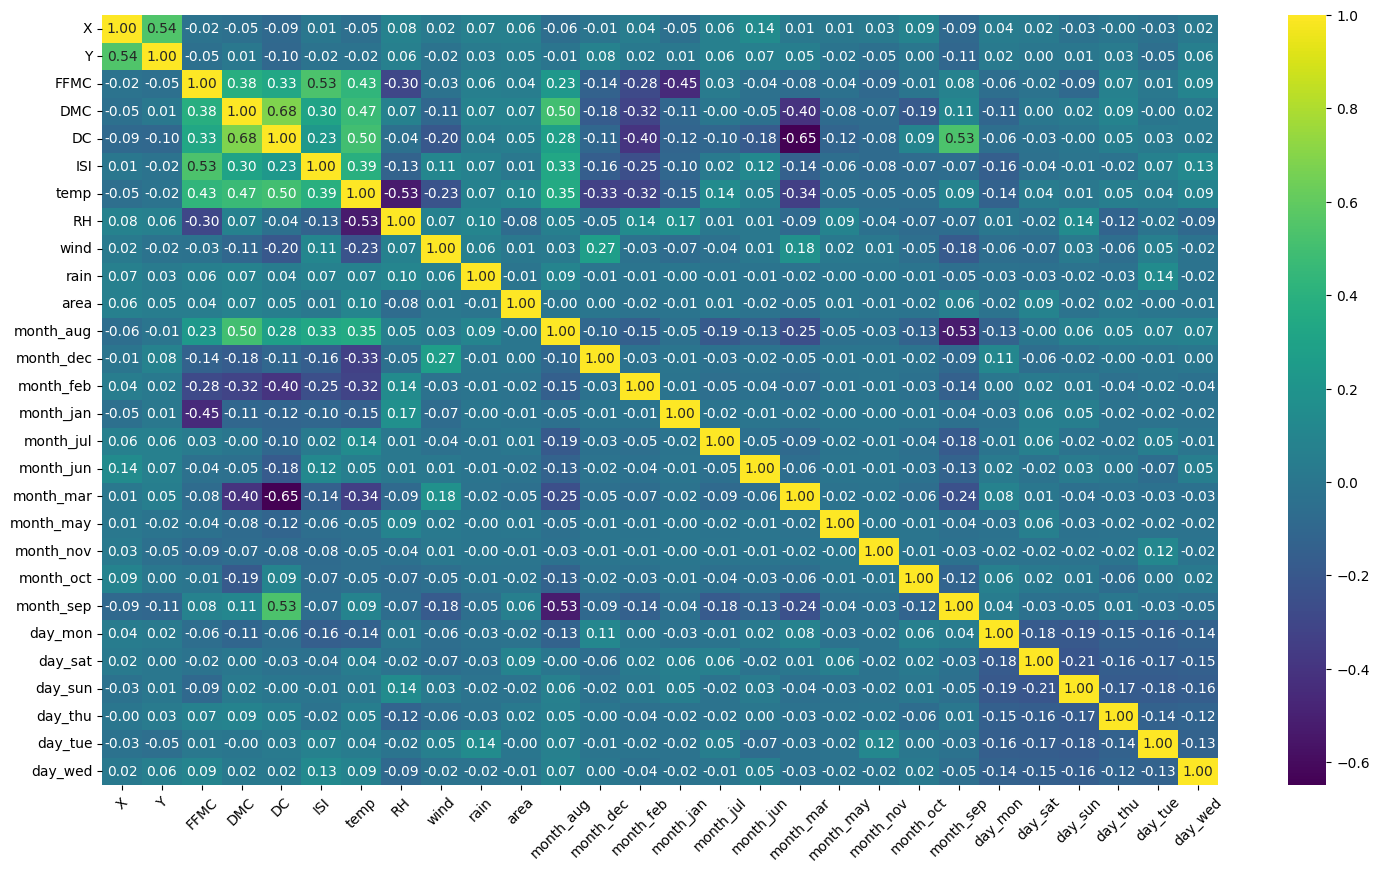

In [15]:
corr = oe.corr()

plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.xticks(rotation=45)
plt.yticks()
plt.show()

Observation: The highest correlation coefficient of 0.68 between DMC and DC. The next highest is -0.65 between DC and month_mar.

In [16]:
oe.drop('rain', axis=1, inplace=True)

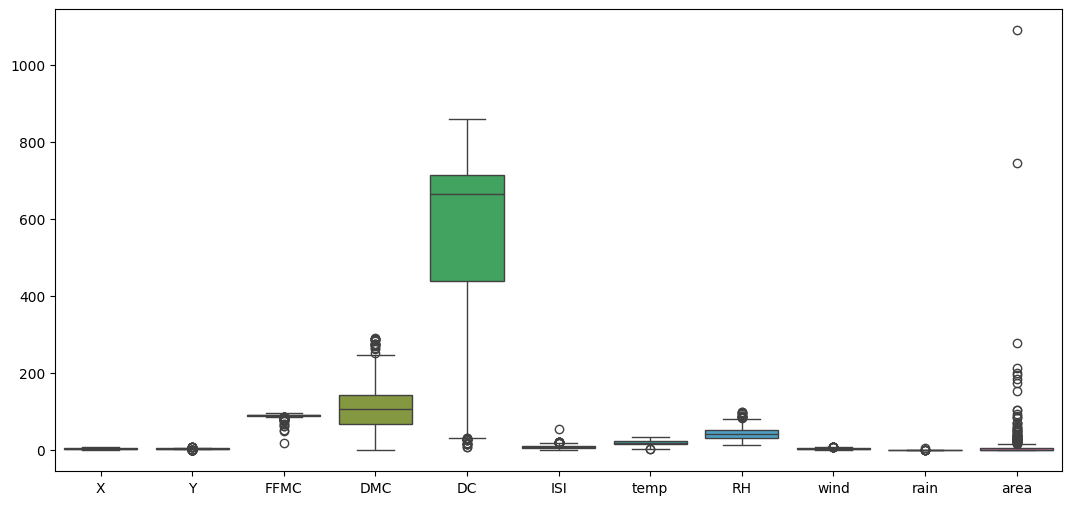

In [17]:
plt.figure(figsize=(13,6))
sns.boxplot(data=data)
plt.show()

### Handling Outliers

In [18]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outlier_columns = ['FFMC', 'DMC', 'DC', 'ISI', 'RH', 'wind', 'rain']
for col in outlier_columns:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in FFMC: 53
Outliers in DMC: 17
Outliers in DC: 17
Outliers in ISI: 14
Outliers in RH: 12
Outliers in wind: 13
Outliers in rain: 8


Observation: Since my goal is to predict the burned area of forest fires, removing outliers could impact important patterns in extreme fire events. Some meteorological variables like rain, wind, RH have high variability, so getting rid of outliers wouldn't be ideal.

Therefore, i will handlie them by using robust scaler.

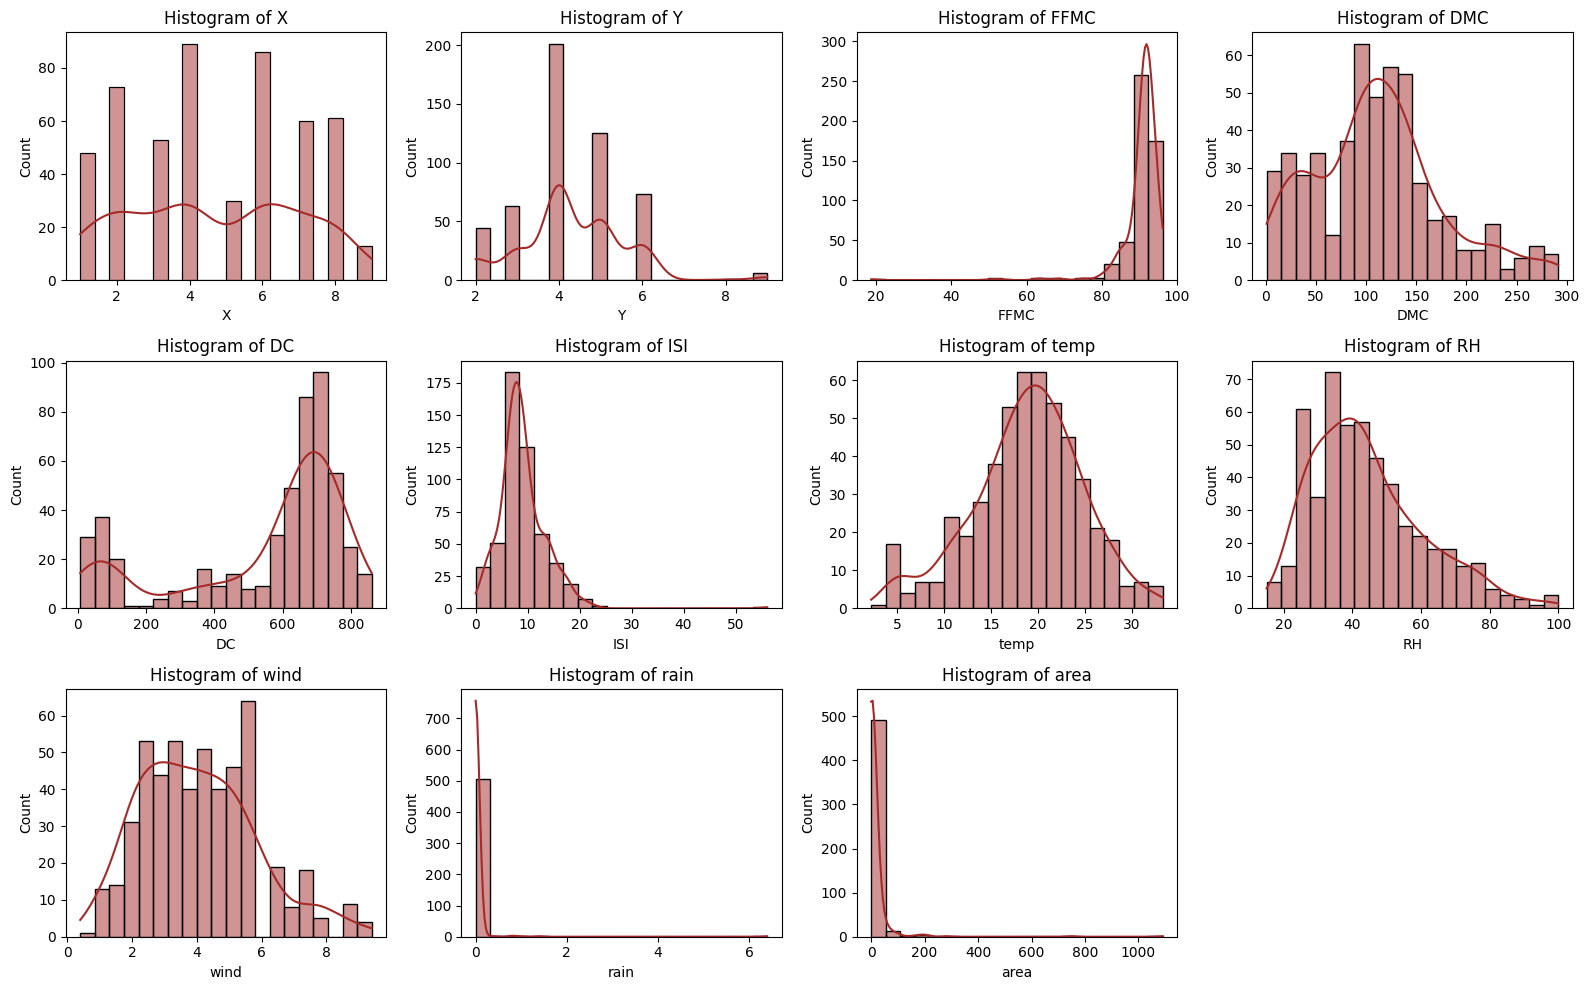

In [19]:
numerical_cols = data.select_dtypes(include=['number']).columns

plt.figure(figsize=(16,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[col], kde=True, bins=20, color='brown')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.show()

Observation:
- temp, DMC, wind, RH, ISI are roughly bell-shaped, aa slight skewness may not be significant but can still affect modeling if assumptions of normality are important.
- FFMC, DC is right skewed.
- rain values are always positive, but most observations show little to no rainfall.
- X, Y, month, day have integers as values rathen than continuous floats, they appear as discrete bars rather than smooth histograms. (These are encoed categorical features)
- area is the target value

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

X = oe.drop('area', axis=1)
Y = oe['area']


vif_df = pd.DataFrame({'Feature': oe.columns,
                       'VIF': [vif(oe.values, i) for i in range(oe.shape[1])]})

vif_df

,Feature,VIF
0,X,7.786450
1,Y,19.916344
2,FFMC,130.806724
3,DMC,14.678522
4,DC,156.479835
5,ISI,7.855402
6,temp,46.571041
7,RH,18.558800
8,wind,7.390229
9,area,1.090214


Observation:
- Dropping FFMC and DC as it has more than 100 of VIF.


In [29]:
oe.drop(['FFMC', 'DC'], axis=1, inplace=True)

vif_data = pd.DataFrame({'Feature': oe.columns,
                       'VIF': [vif(oe.values, i) for i in range(oe.shape[1])]})
vif_data

,Feature,VIF
0,X,7.687708
1,Y,19.323687
2,DMC,9.142059
3,ISI,6.986842
4,temp,31.852252
5,RH,13.954571
6,wind,7.038280
7,area,1.077835
8,month_aug,25.565308
9,month_dec,1.644528


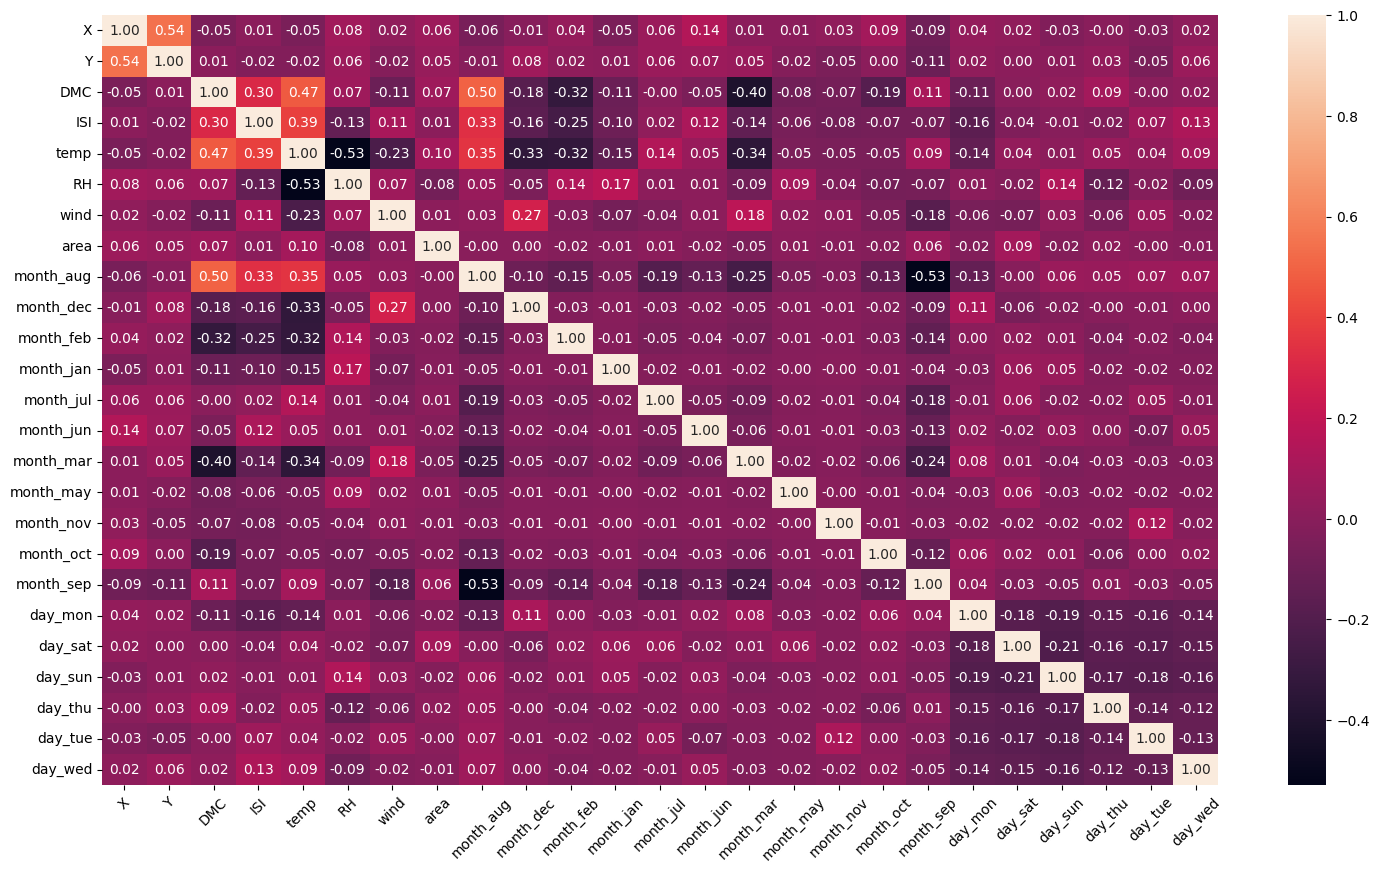

In [30]:
corr = oe.corr()

plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.xticks(rotation=45)
plt.yticks()
plt.show()

Observation:
- temp has a strong correlation with RH and ISI, so dropping temp.
- month_aug also has a strong correlation with DMC and momth_sep, so dropping month_aug.

In [31]:
oe.drop(['temp', 'month_aug'], axis=1, inplace=True)

vif_data = pd.DataFrame({'Feature': oe.columns,
                       'VIF': [vif(oe.values, i) for i in range(oe.shape[1])]})
vif_data

,Feature,VIF
0,X,7.641777
1,Y,16.868075
2,DMC,6.812599
3,ISI,5.777237
4,RH,8.675177
5,wind,6.752518
6,area,1.075871
7,month_dec,1.339468
8,month_feb,1.417335
9,month_jan,1.106795


### Feature Scaling

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train


,X,Y,DMC,ISI,temp,RH,wind,month_aug,month_dec,month_feb,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
324,6,5,53.3,5.4,13.7,56,1.8,0,0,0,...,0,0,0,1,0,0,0,1,0,0
333,1,4,87.7,9.5,18.1,54,3.1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
175,1,4,96.9,8.9,20.3,39,4.9,1,0,0,...,0,0,0,0,0,1,0,0,0,0
275,4,6,26.4,2.0,5.1,61,4.9,0,1,0,...,0,0,0,0,0,0,0,1,0,0
496,4,5,175.5,16.8,32.6,26,3.1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,4,5,88.0,7.1,20.3,45,3.1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
273,4,6,27.2,6.8,4.8,57,8.5,0,1,0,...,0,0,0,0,0,0,1,0,0,0
352,7,4,99.0,9.6,20.6,43,3.6,0,0,0,...,0,0,0,1,0,0,0,0,0,0
439,1,3,91.3,7.2,19.1,46,2.2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Linear Regression